In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("D:\\jyotsna\\python folder\\linkedin.csv")

In [6]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [7]:
df.tail()

,Review,Rating
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2
701,One of the best looking and well designed apps...,5


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# Exploratory Data

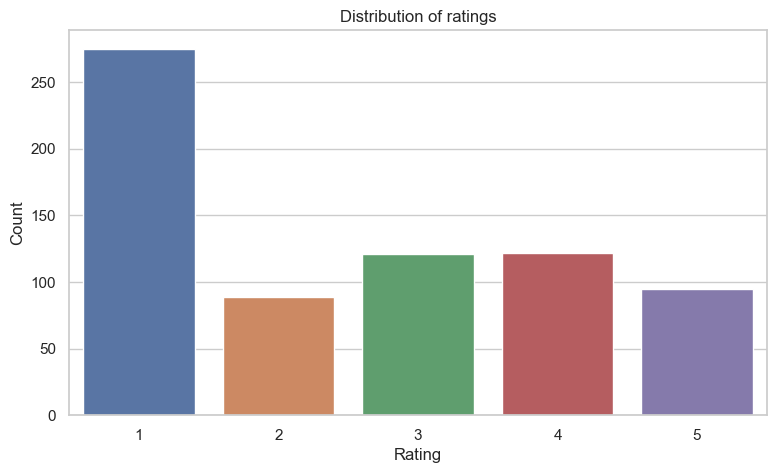

In [11]:
#ploting Distributions of ratings

sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df,
             x = 'Rating')
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# now we analysize the length of reviews ,as this can sometimes correlate with the sentiment or detail of feedback,we will calculate the first length of reviews and visualize the data.

In [12]:
df['Review length'] = df['Review'].apply(len) 

In [13]:
df.head(3)

,Review,Rating,Review length
0,Does absolutely nothing for a LinkedIn beginne...,1,80
1,Force close(galaxy tab),1,23
2,Slow and it tries to upload your contacts with...,1,61


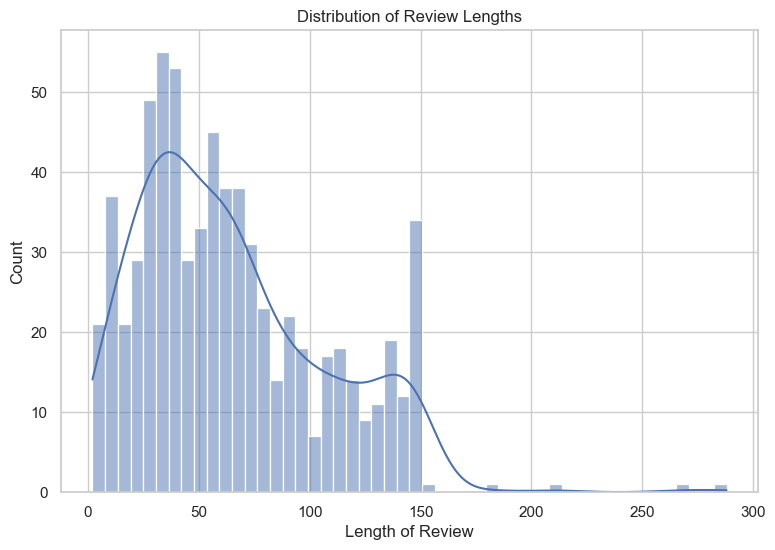

In [16]:
# ploting the distribution of review length


plt.figure(figsize = (9,6))
sns.histplot(df['Review length'], bins = 50 , kde = True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

# Adding Sentiment Labels in The data
We will use Textblob library. Textblob library provides a polarity score ranging from - 1(very negative) to +1 (very positive) for a given text. We can use this score to classify each reviews sentiment as positive , negative or neutral

In [17]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.0 MB/s eta 0:00:00


In [18]:
from textblob import TextBlob

In [19]:
def textblob_sentiment_analysis(Review):
    sentiment = TextBlob(Review).sentiment
    if sentiment.polarity > 0.1 :
        return 'Positive'
    elif sentiment.polarity < -0.1 :
        return 'Negative'
    else :
        return 'Neutral'

In [23]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [24]:
df.head(3)

,Review,Rating,Review length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative


# Analyzing App Reviews Sentiments

In [26]:
sentiment_distribution = df['Sentiment'].value_counts() 

In [27]:
sentiment_distribution 

Positive    298
Neutral     297
Negative    107
Name: Sentiment, dtype: int64

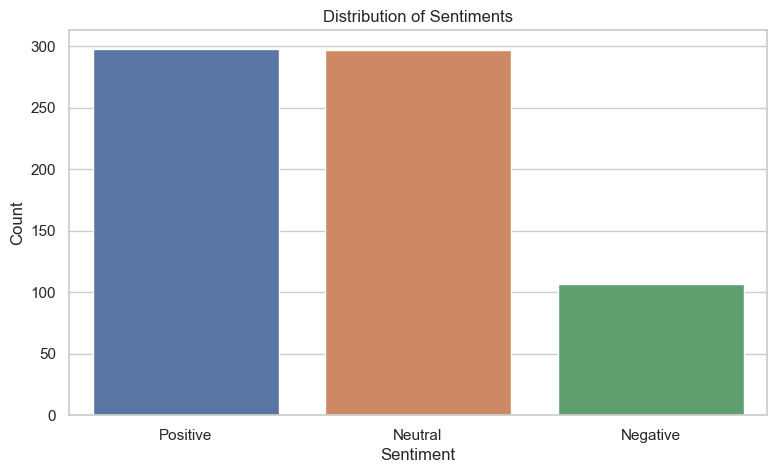

In [28]:


# ploting the distribution of sentiments

plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
           y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# So, we can see although the app has low ratings, still thw reviewsers don't use many negative words in the reviews for the app
Now , we will explore the relationship between the sentiments and the ratings. this analanalysis can help us to understand whether there is a correlation betweeen the sentiments of the text and the numerical ratings.

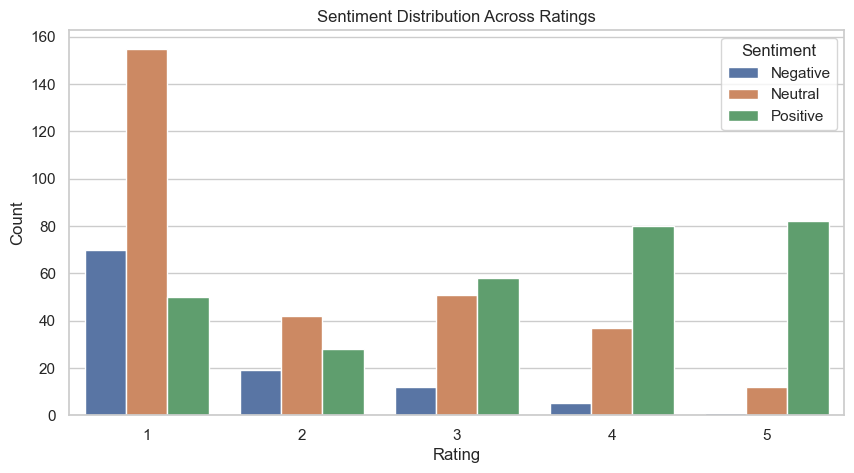

In [30]:


plt.figure(figsize = (10,5)) 
sns.countplot(data = df , 
             x = 'Rating',
             hue = 'Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show() 

# Summary
So, App Reviews Sentiment Analysis is a valuable tool For app developer and business to understnad user feedback, prioritz feauter updates, and maintain a positive user community.